# Importing libraries

In [1]:
!pip install numpy
!pip install pandas
!pip install googletrans
!pip install langdetect
!pip install tqdm
!pip install matplotlib
!pip install nltk
!pip install scikit-learn
!pip install wordcloud
!pip install gensim
!pip install seaborn  #palette
!pip install pyLDAvis
!pip install nltk 
!pip install spacy
!pip install seaborn

ERROR: Invalid requirement: '#palette'


In [2]:
import time
import numpy as np
import pandas as pd
from tqdm import tqdm
from math import isnan
# imports for data visualization
import matplotlib.pyplot as plt #simple colors 
from wordcloud import WordCloud, STOPWORDS
from IPython.display import display

import re
from collections import Counter 
from googletrans import Translator
from gensim.models import KeyedVectors
from gensim.parsing.preprocessing import *
from langdetect import detect

from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.feature_extraction.text import TfidfVectorizer


In [3]:
import nltk
from nltk import pos_tag
from nltk.corpus import wordnet
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mdfl0\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mdfl0\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mdfl0\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mdfl0\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
# library imports
import requests
import time
import pandas as pd
import numpy as np
import ast
import re
from tqdm import tqdm

# preprocessing imports
from nltk.tokenize import RegexpTokenizer, word_tokenize, regexp_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# modeling imports
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB #naive bayes
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVR
from sklearn.manifold import TSNE


#NLP imports
from nltk.stem import PorterStemmer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.corpora import Dictionary
#from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import seaborn as sns
import pyLDAvis
from pyLDAvis import gensim_models as gensimvis
from numpy import array, nan

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mdfl0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
c:\users\mdfl0\appdata\local\programs\python\python39\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


# Read Data 

In [ ]:
# start the time checker of the program
start_time = time.time()

In [5]:
class reading:
    def __init__(self, file):
        
        # read file
        self.file = file
        self.df = pd.read_csv(file,error_bad_lines=False, engine="python")
        
        #print description before pre-clean up
        print("Before pre-clean up data:")
        self.printing()
        
        # pre-clean up
        if 'sub_title' in self.df.columns:
            self.df.drop('sub_title', axis=1, inplace=True) 
        
        #print description after pre-clean up
        print("After pre-clean up data:")
        self.printing()
        
    def printing(self):
        # print csv file description
        print("Column names: {}".format(self.df.columns))
        print("Dataframe shape: {}".format(self.df.shape))
        print("Null values per column: \n{}".format(self.df.isnull().sum()))
        print("Total null values: {}\n\n".format(self.df.isnull().sum().sum()))
        
    def output(self):
        print(self.df.head())
        return self.df
        

# Preprocess data

In [14]:
class preprocessing:
    def __init__(self, dataframe, column_name, added_stopwords=None):
        
        # create needed static variable
        self.column_name = column_name
        self.stop_words = stopwords.words('english')       # words to stop
        self.df = dataframe                                # dataframe
        self.token_list = []                               # list of list of tokens    
        self.tokenizer = RegexpTokenizer(r"\b[^\d\W]+\b")  # tokenizer
        
        # add words to stop if there are any
        if added_stopwords is not None:
            self.stop_words.extend(added_stopwords)
        
        # tokenize data
        self.tokenize()
        
        # append to dataframe
        self.df["{}_tokens".format(self.column_name)] = self.lemmatized_unstopped_tokens
        
    def tokenize(self):
        # use regular expression to tokenize data; outputs a list of list of tokens
        self.initial_tokens = [self.tokenizer.tokenize(text_article) for text_article in self.df[self.column_name]]
        
        # add part of speech tag (for better lemmatization accuracy)
        self.tagged_tokens = [pos_tag(token_list) for token_list in self.initial_tokens]
        
        # lemmatize tokens
        self.lemmatized_tokens = [self.lemma(token_list) for token_list in self.tagged_tokens]
        
        # stop unnecesary words or tokens; outputs a list of list of unstopped and lemmatized tokens
        self.lemmatized_unstopped_tokens = [[token for token in token_list if len(token) > 3 and token not in self.stop_words] for token_list in self.lemmatized_tokens]

        
    def lemma(self, tokens):
        # create a lemmatizer object
        lemmatizer = WordNetLemmatizer()
        
        #create a list of lemmatized tokens
        self.list_lemma_tokens = []
        
        # get the pos tag then lemmatize
        for token, tag in tokens:
            tag = self.get_wordnet_pos(tag)
            self.list_lemma_tokens.append(lemmatizer.lemmatize(token, tag))
            
        # return list
        return self.list_lemma_tokens
    
    # returns the pos tag of a token (adjective, noun, verb, adverb)
    def get_wordnet_pos(self, treebank_tag):
        if treebank_tag.startswith('J'):
            return wordnet.ADJ
        elif treebank_tag.startswith('V'):
            return wordnet.VERB
        elif treebank_tag.startswith('N'):
            return wordnet.NOUN
        elif treebank_tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN # default value
    
        
    def output(self):
        print(self.df.head())
        return self.df

In [ ]:
#class visuals:
    

In [25]:
# read and print the description of the csv file
x = reading('Hello!.csv')

Before pre-clean up data:
Column names: Index(['Timestamp', 'Name (don't input your real name)',
       'How was your day? (Please answer in English)', 'In a relationship?',
       'Answer in English. If you are to be given a chance to have a healthy relationship, would you take it? Can you explain why in two or more sentences? (keep blank if in a relationship)'],
      dtype='object')
Dataframe shape: (28, 5)
Null values per column: 
Timestamp                                                                                                                                                                                0
Name (don't input your real name)                                                                                                                                                        0
How was your day? (Please answer in English)                                                                                                                                             0


In [26]:
# return and print the dataframe
df = x.output()
df.dropna(axis=0, inplace=True)

                     Timestamp Name (don't input your real name)  \
0  2023/03/13 3:04:42 PM GMT+8                             Jopay   
1  2023/03/13 3:05:20 PM GMT+8                             Pedro   
2  2023/03/13 3:05:21 PM GMT+8                             jessa   
3  2023/03/13 3:05:56 PM GMT+8                               Lei   
4  2023/03/13 3:07:04 PM GMT+8                               Den   

  How was your day? (Please answer in English) In a relationship?  \
0                                     Tiresome                yes   
1                  Looking forward to survive.                 no   
2                                     not okay                yes   
3                                         Good                yes   
4               It is fine but my pc is broken                 no   

  Answer in English. If you are to be given a chance to have a healthy relationship, would you take it? Can you explain why in two or more sentences? (keep blank if in a relati

In [27]:
# renaming columns
new_names = {'Name (don\'t input your real name)': 'names', 'How was your day? (Please answer in English)': 'day', 
             "Answer in English. If you are to be given a chance to have a healthy relationship, would you take it? Can you explain why in two or more sentences? (keep blank if in a relationship)": 'Answers'}
df = df.rename(columns=new_names)
df.head()

,Timestamp,names,day,In a relationship?,Answers
1,2023/03/13 3:05:20 PM GMT+8,Pedro,Looking forward to survive.,no,"Who would not love that? Of course, I would. W..."
4,2023/03/13 3:07:04 PM GMT+8,Den,It is fine but my pc is broken,no,"No, I am not ready to enter in a relationship."
5,2023/03/13 3:07:07 PM GMT+8,nanananana,My day was exhausting.,no,"It depends, because it takes a lot of effort t..."
6,2023/03/13 3:08:38 PM GMT+8,Arjay Rosel,Happy because our grades are now complete!!,no,No!! I don't want additional responsibilities ...
7,2023/03/13 3:08:45 PM GMT+8,Bart,Busyy,no,"Yes, if that healthy relationship lasts foreve..."


In [28]:
# create a class that preprocess the data
column_name = 'Answers'
preprocess = preprocessing(df,column_name)

In [29]:
# return and print the final dataframe
final_df = preprocess.output()

                     Timestamp        names  \
1  2023/03/13 3:05:20 PM GMT+8        Pedro   
4  2023/03/13 3:07:04 PM GMT+8          Den   
5  2023/03/13 3:07:07 PM GMT+8   nanananana   
6  2023/03/13 3:08:38 PM GMT+8  Arjay Rosel   
7  2023/03/13 3:08:45 PM GMT+8         Bart   

                                           day In a relationship?  \
1                  Looking forward to survive.                 no   
4               It is fine but my pc is broken                 no   
5                       My day was exhausting.                 no   
6  Happy because our grades are now complete!!                 no   
7                                        Busyy                 no   

                                             Answers  \
1  Who would not love that? Of course, I would. W...   
4     No, I am not ready to enter in a relationship.   
5  It depends, because it takes a lot of effort t...   
6  No!! I don't want additional responsibilities ...   
7  Yes, if that health

In [30]:
# convert dataframe to csv
final_df.to_csv("reactions.csv", index=False)

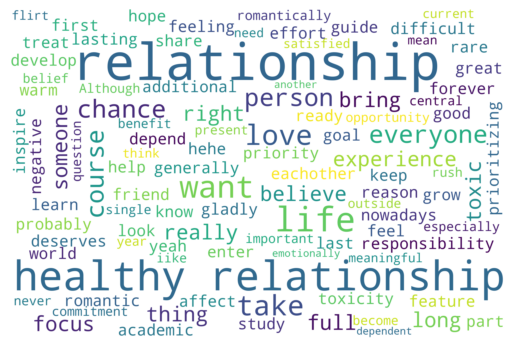

In [31]:
# Create a WordCloud object with the desired specifications
wordcloud = WordCloud(width=1200, height=800, max_words=100, background_color="white", scale=2)

# Concatenate the tokens in each sub-list and generate the wordcloud
string_list = [' '.join(sub_list) for sub_list in final_df["{}_tokens".format(column_name)]]
combined_string = ' '.join(string_list)
wordcloud.generate(combined_string)

# Display the wordcloud using matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()